In [51]:
import joblib
import numpy as np
from matplotlib import pyplot as plt

np.set_printoptions(precision=4, suppress=True)
DATA_DIR = 'data/motion/0-TairanTestbed_TairanTestbed_CR7_video_CR7_level1_filter_amass.pkl'

In [8]:
with open(DATA_DIR, 'rb') as f:
    datafile = joblib.load(f)

data = datafile['0-TairanTestbed_TairanTestbed_CR7_video_CR7_level1_filter_amass']

In [11]:
data.keys()

dict_keys(['root_trans_offset', 'pose_aa', 'dof', 'root_rot', 'smpl_joints', 'fps'])

In [57]:
def detect_sign_changes(arr):
    """
    Detects indices where the sign of consecutive elements changes in a 1D NumPy array.

    Parameters:
        arr (numpy.ndarray): Input 1D array.

    Returns:
        numpy.ndarray: Indices where the sign changes.
    """
    sign_changes = np.where(np.sign(arr[:-1]) != np.sign(arr[1:]))[0]
    return sign_changes

In [86]:
data['smpl_joints'].shape

(119, 24, 3)

[  0  10  14  20  38  55  64  66  69  75  77  78  84  85 106 107 109]


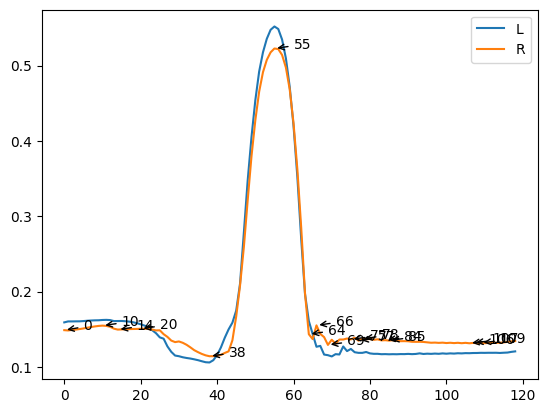

In [93]:
left_knee = data['smpl_joints'][:, 7, 2]
right_knee = data['smpl_joints'][:, 8, 2]
t = np.array(list(range(len(left_knee))))/data['fps']

left_knee_grad = np.gradient(left_knee, 1/data['fps'])
right_knee_grad = np.gradient(right_knee, 1/data['fps'])

plt.figure()
plt.plot(left_knee, label='L')
plt.plot(right_knee, label='R')

joint_traj = right_knee

extremum = detect_sign_changes(np.gradient(joint_traj, 1/data['fps']))

print(extremum)

for point in extremum:
    plt.annotate(f'{point}', xy=(point, joint_traj[point]), xytext=(point+5, joint_traj[point]), 
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    
plt.legend()

In [ ]:
left_knee = data['dof'][:, 3]
right_knee = data['dof'][:, 9]
comp = data['dof'][:, 19]
t = np.array(list(range(len(left_knee))))/data['fps']

left_knee_grad = np.gradient(left_knee, 1/data['fps'])
right_knee_grad = np.gradient(right_knee, 1/data['fps'])

plt.figure()
plt.plot(left_knee, label='L')
plt.plot(right_knee, label='R')

joint_traj = right_knee

extremum = detect_sign_changes(np.gradient(joint_traj, 1/data['fps']))

print(extremum)

for point in extremum:
    plt.annotate(f'grad=0', xy=(point, joint_traj[point]), xytext=(point+5, joint_traj[point]), 
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
    
plt.legend()

In [94]:
left_contact = np.zeros_like(left_knee)
left_contact[37:69] = 1
right_contact = np.zeros_like(right_knee)
right_contact[38:64] = 1


ddp_cr7_data = {k: v for k, v in data.items()}
ddp_cr7_data['contact'] = np.stack((left_contact, right_contact)).transpose(1,0)
ddp_cr7_data['contact_legend'] = 'LR'

joblib.dump(ddp_cr7_data, 'data/motion/ddp_cr7_data.pkl')

['data/motion/ddp_cr7_data.pkl']